In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import decomposition
from sklearn.feature_selection import SelectPercentile,SelectKBest
import warnings
warnings.filterwarnings('ignore') #ignoring warmings

In [2]:
df=pd.read_csv('C:\\Users\\Shreyash\\Desktop\\data.csv')

# Data Cleaning

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.shape

(569, 33)

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<AxesSubplot:>

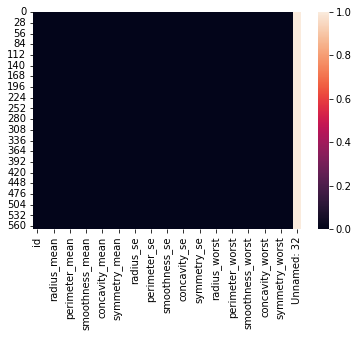

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)

In [13]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Data Visualization

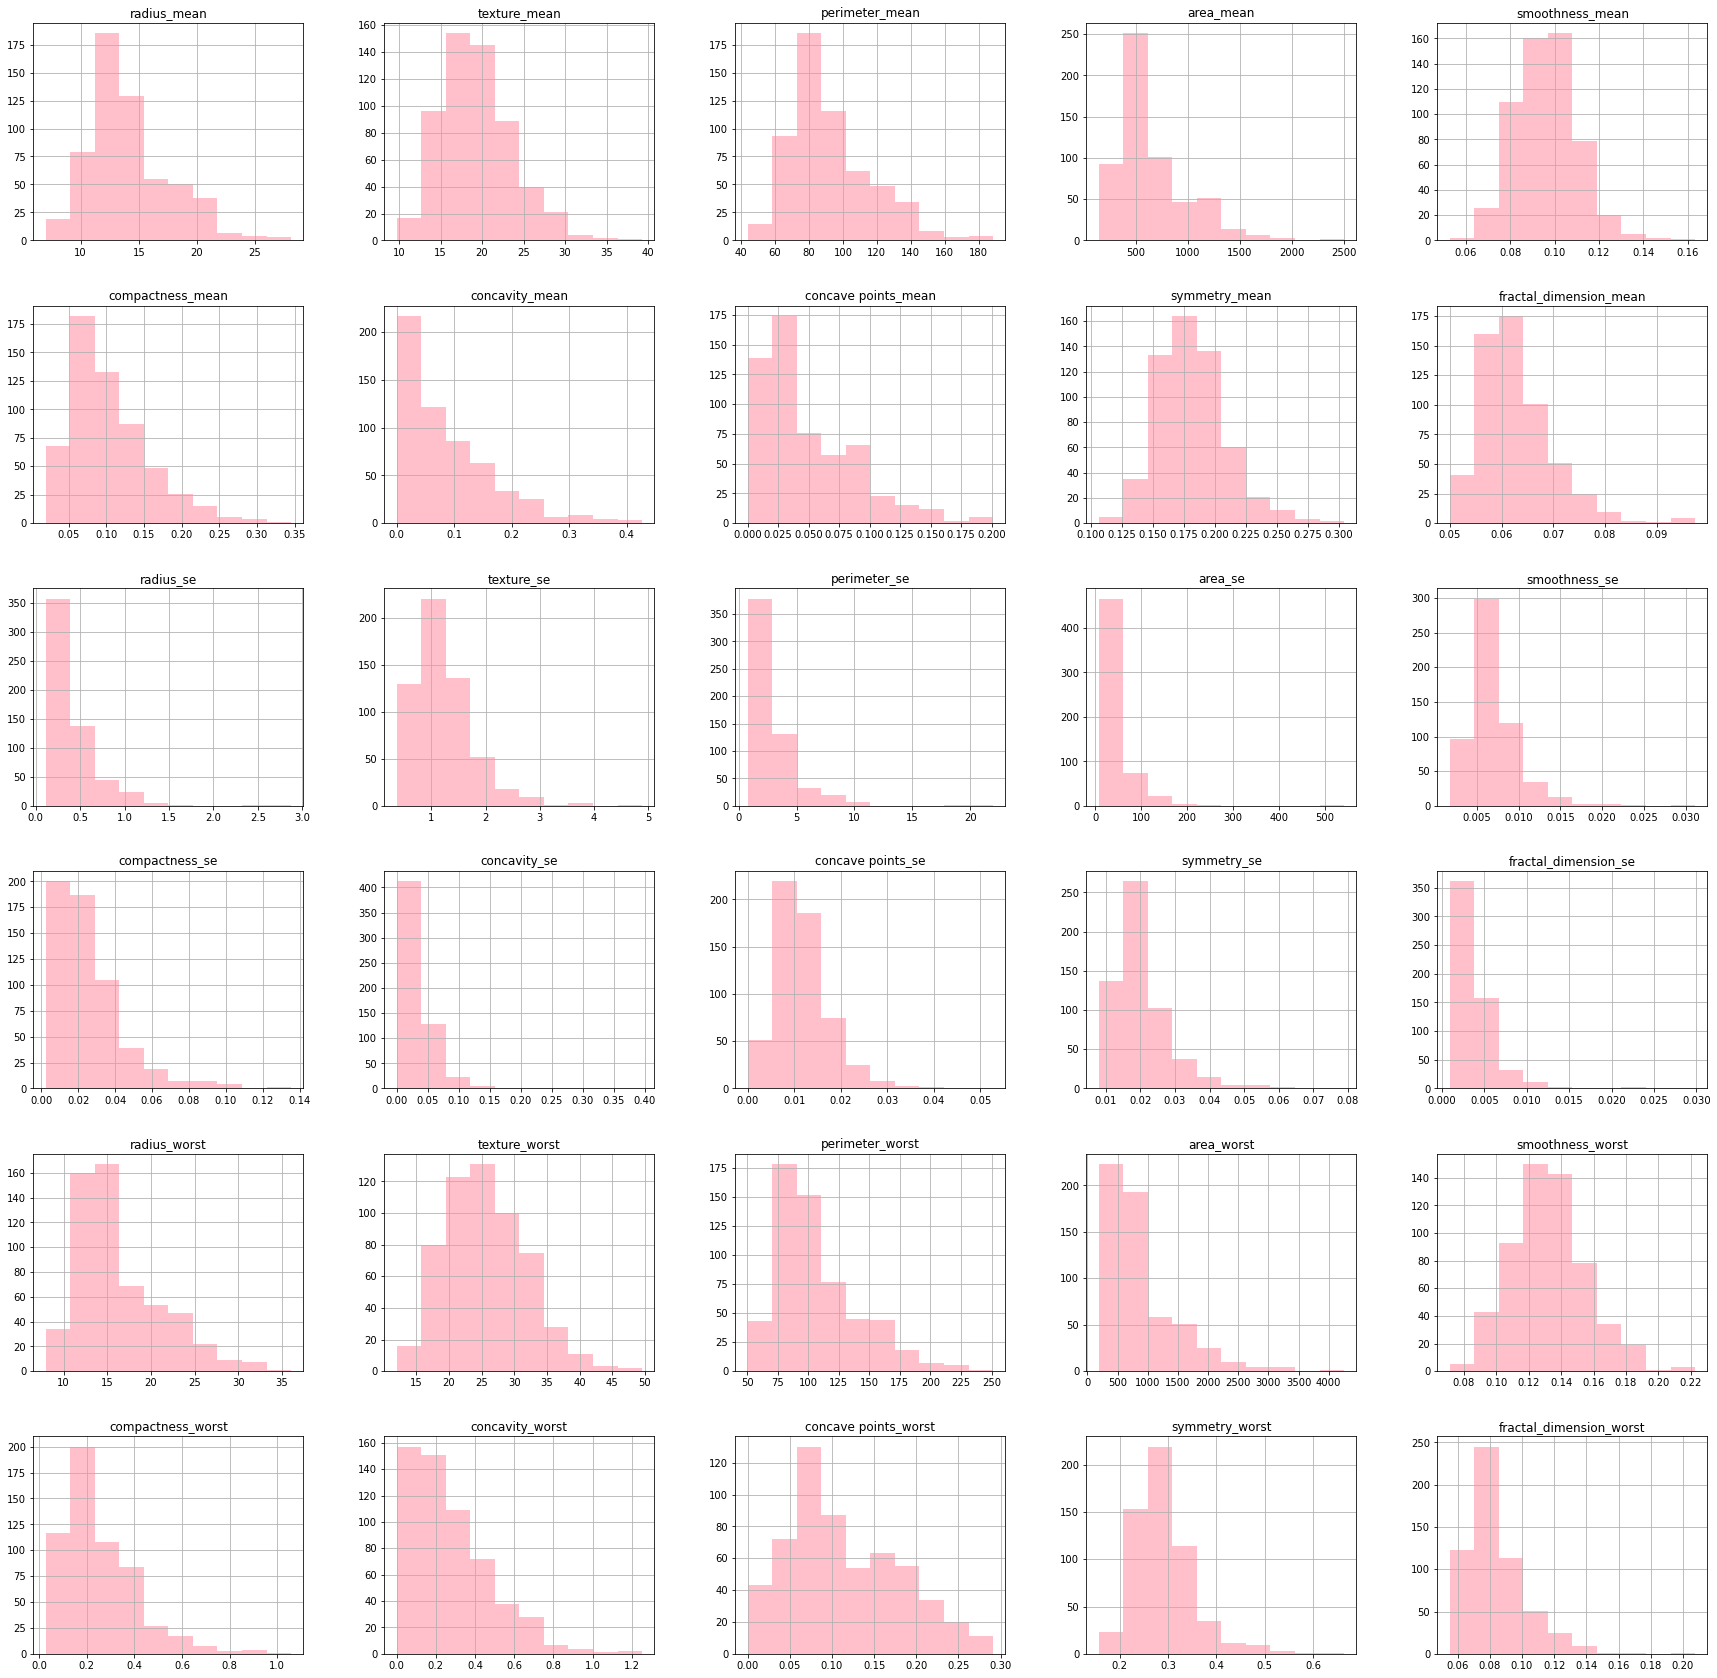

In [14]:
#plot the histograms for each feature:
df.hist(figsize = (30,30), color = 'pink')
plt.show()

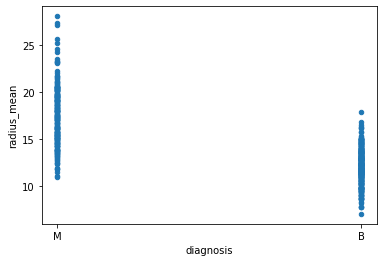

In [15]:
#scatterplot
df.plot.scatter(x='diagnosis',y='radius_mean');

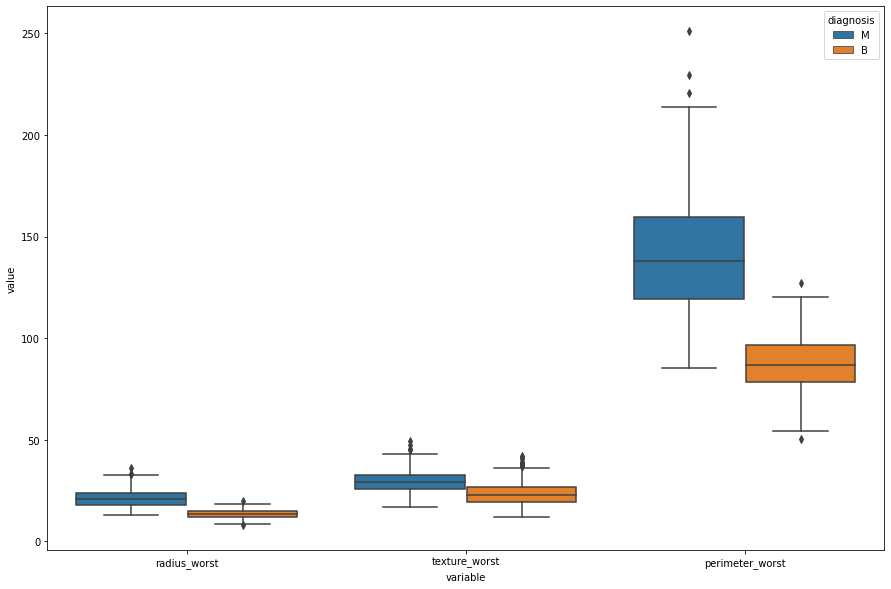

In [16]:
melted_data = pd.melt(df,id_vars = "diagnosis",value_vars = ['radius_worst', 'texture_worst', 'perimeter_worst'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [17]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(30, 30)

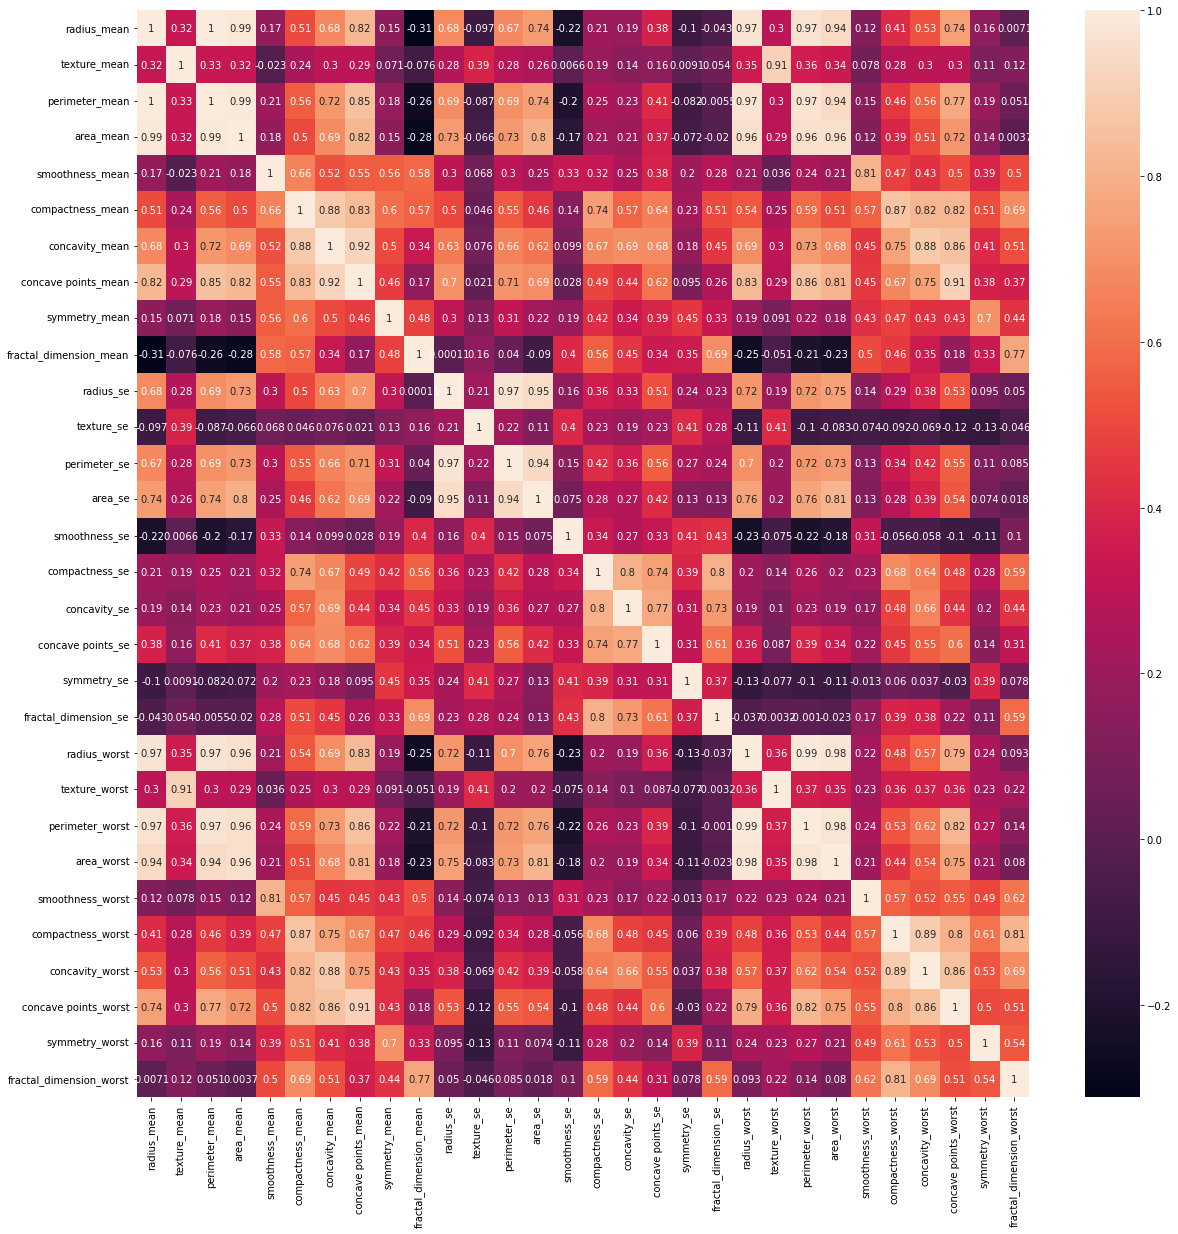

In [18]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

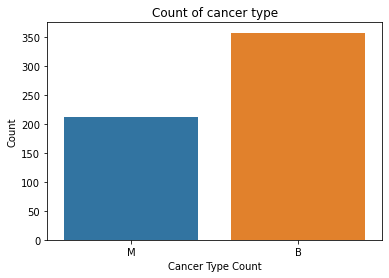

In [19]:
# Analyzing the target variable

plt.title('Count of cancer type')
sns.countplot(df['diagnosis'])
plt.xlabel('Cancer Type Count')
plt.ylabel('Count')
plt.show()

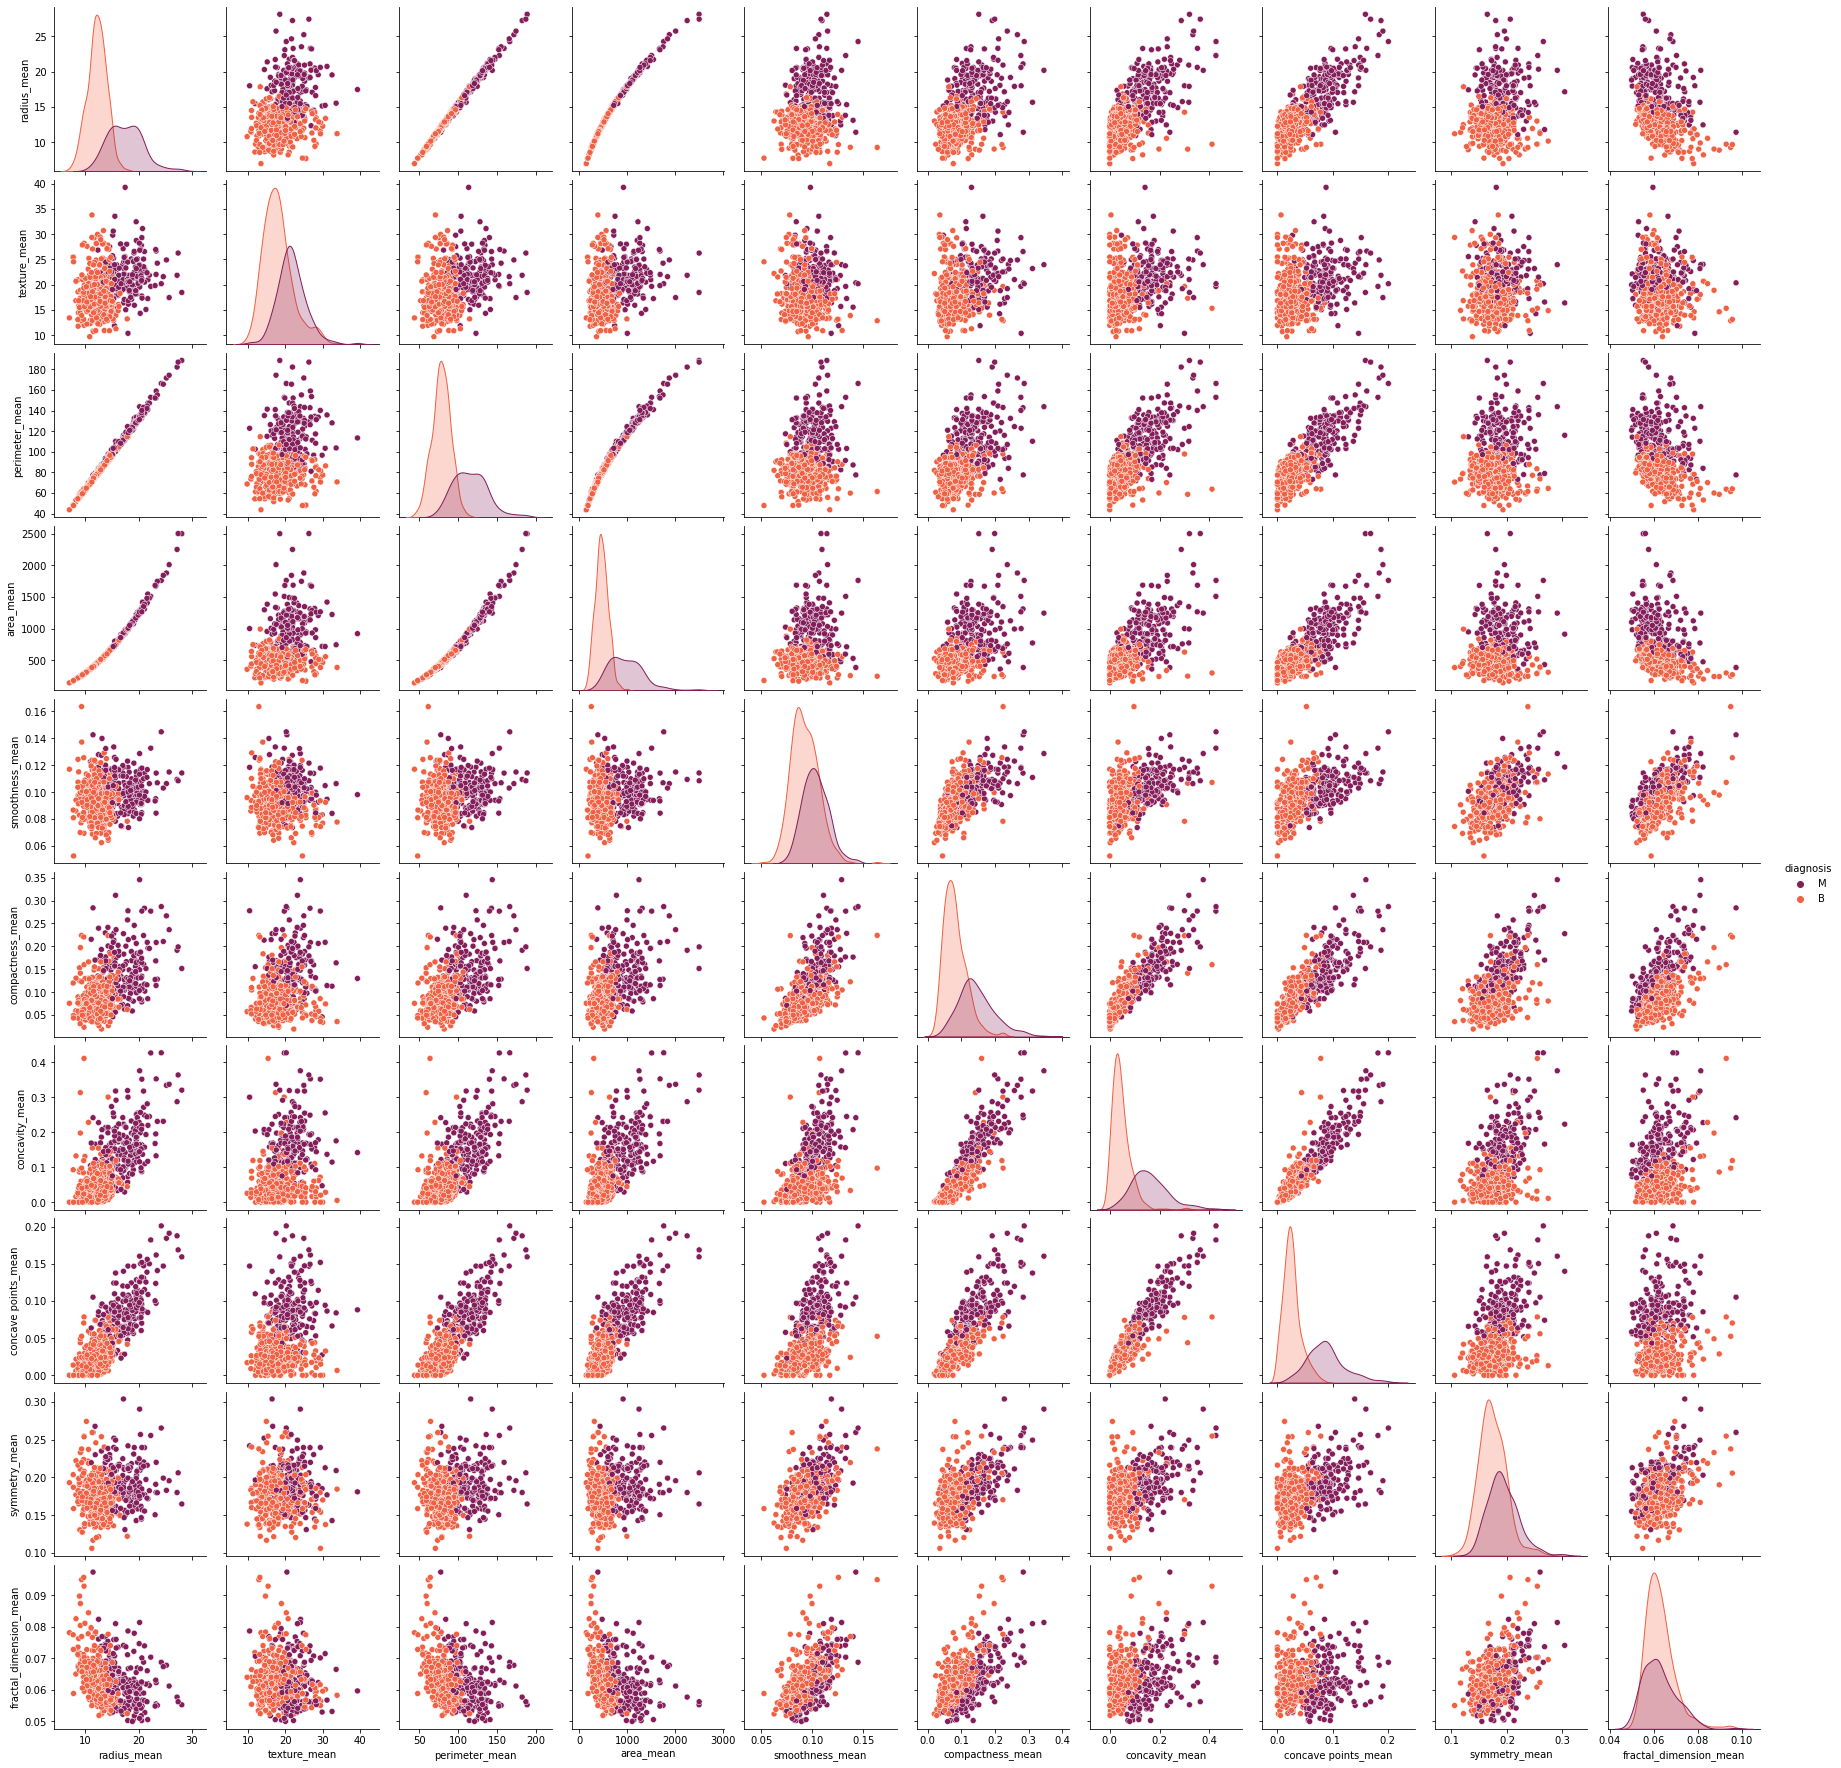

In [20]:
#generate a scatter plot with the following columns:

columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(data=df[columns], hue="diagnosis", palette='rocket')

# PreProcessing
## Define Target Data

In [21]:
#split the dataset into training and testing sets
features = df.drop(['diagnosis'],axis=1).values
classes=df['diagnosis'].values

In [22]:
feat_train, feat_test, class_train, class_test = train_test_split(features, classes, test_size=0.2, random_state=9)

In [23]:
print('features train shape: ', feat_train.shape)
print('classes train shape: ', class_train.shape)
print('features test shape: ', feat_test.shape)
print('classes test shape: ', class_test.shape)

features train shape:  (455, 30)
classes train shape:  (455,)
features test shape:  (114, 30)
classes test shape:  (114,)


## Decision Tree Classifier 

Criterion=Gini

In [24]:
#Training
dectree=DecisionTreeClassifier(criterion='gini')

dectree.fit(feat_train,class_train)

DecisionTreeClassifier()

In [25]:
#predict target values
pred=dectree.predict(feat_test)
print(pred)

['B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M']


In [26]:
#confusion matrix and accuracy
print("Accuracy",accuracy_score(class_test,pred))
print("Classification Report\n",classification_report(class_test,pred))
print("Confusion Matrix\n",confusion_matrix(class_test,pred))

Accuracy 0.9385964912280702
Classification Report
               precision    recall  f1-score   support

           B       0.94      0.97      0.95        74
           M       0.95      0.88      0.91        40

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix
 [[72  2]
 [ 5 35]]


In [27]:
#Testing
pred=dectree.predict(feat_test)
print("Accuracy:",metrics.accuracy_score(class_test,pred))

Accuracy: 0.9385964912280702


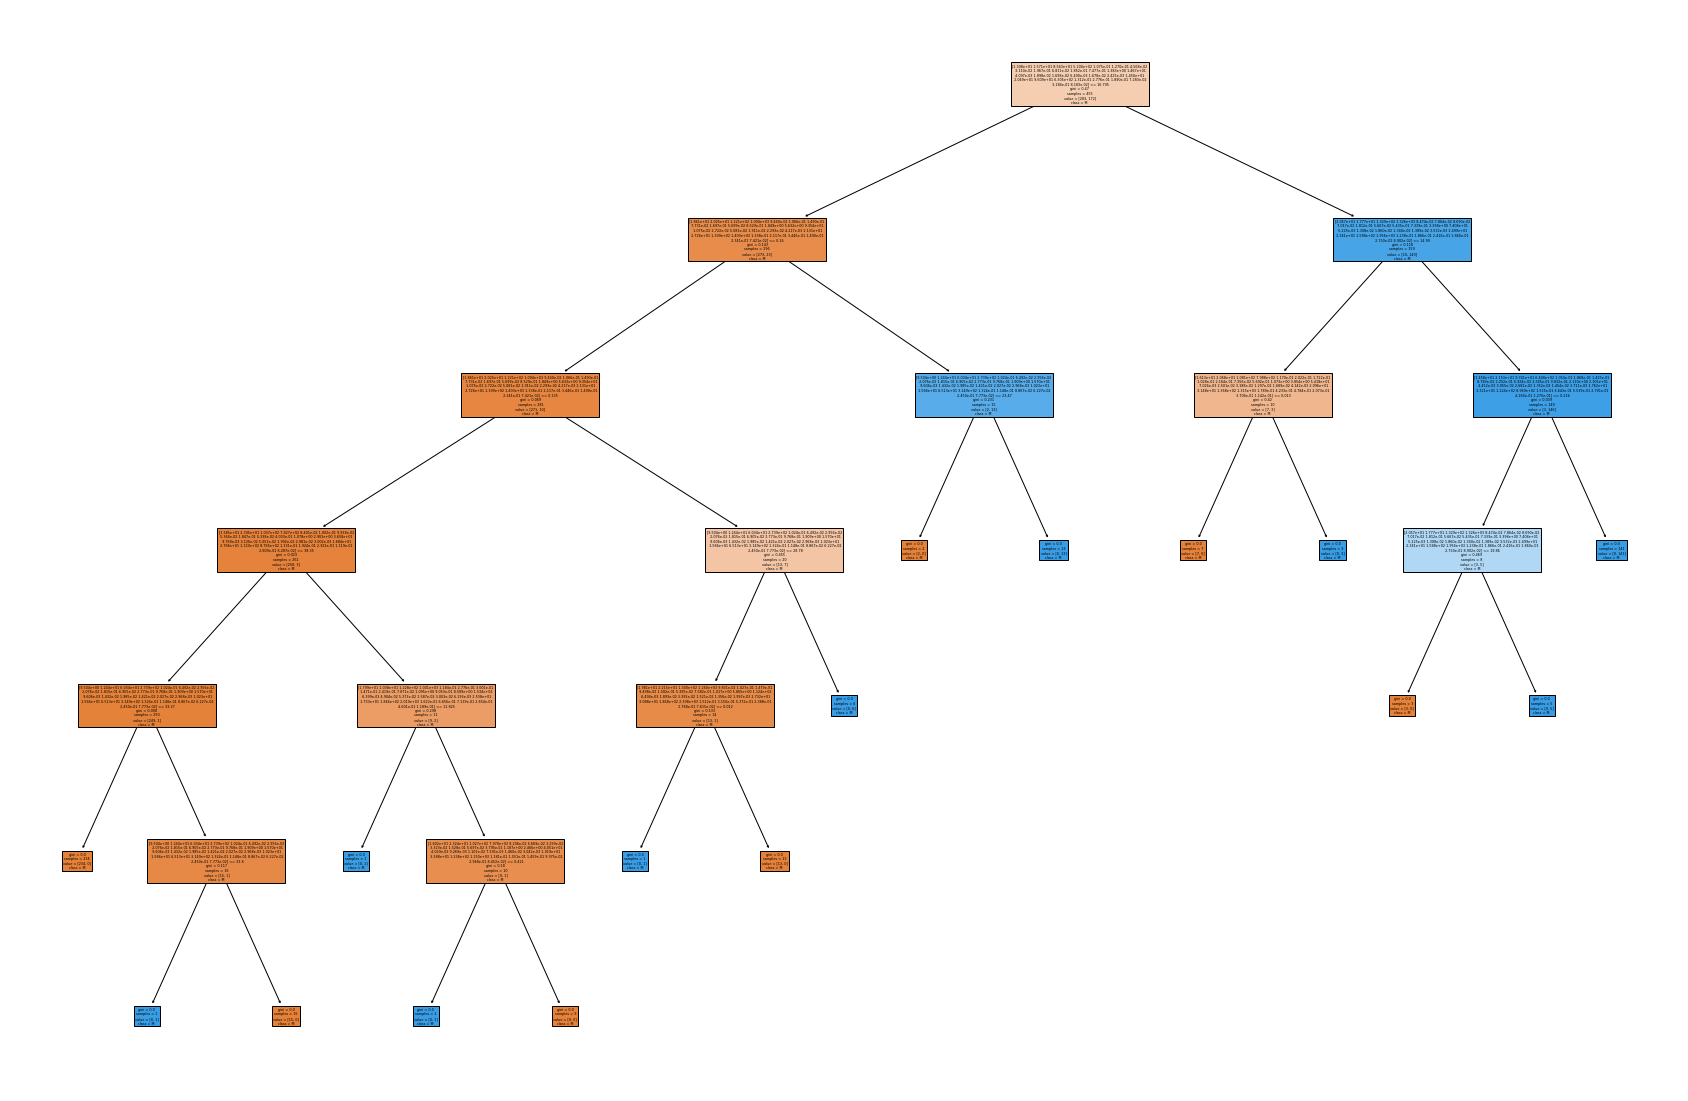

In [28]:
from sklearn import tree
fig=plt.figure(figsize=(30,20))
_=tree.plot_tree(dectree,feature_names=features,class_names=classes,filled=True)

In [29]:
text_representation=tree.export_text(dectree)
print(text_representation)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.16
|   |   |--- feature_27 <= 0.13
|   |   |   |--- feature_13 <= 38.35
|   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |   |--- class: B
|   |   |   |--- feature_13 >  38.35
|   |   |   |   |--- feature_0 <= 11.83
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_0 >  11.83
|   |   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- feature_10 >  0.42
|   |   |   |   |   |   |--- class: B
|   |   |--- feature_27 >  0.13
|   |   |   |--- feature_21 <= 28.78
|   |   |   |   |--- feature_18 <= 0.01
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_18 >  0.01
|   |   |   |   |   |--- class: B
|   |   |   |--- feature_21 >  28.78
|   |   |   |   |--- class:

In [30]:
#Training
dectree=DecisionTreeClassifier(criterion='entropy')
dectree.fit(feat_train,class_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
#confusion matrix and accuracy
pred=dectree.predict(feat_test)
print(pred)
print("Accuracy",accuracy_score(class_test,pred))
print("Classification Report\n",classification_report(class_test,pred))
print("Confusion Matrix\n",confusion_matrix(class_test,pred))

['B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M'
 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M']
Accuracy 0.9473684210526315
Classification Report
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        74
           M       0.95      0.90      0.92        40

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix
 [[72  2]
 [ 4 36]]


In [32]:
text_representation=tree.export_text(dectree)
print(text_representation)

|--- feature_22 <= 105.95
|   |--- feature_27 <= 0.13
|   |   |--- feature_13 <= 48.98
|   |   |   |--- feature_21 <= 33.27
|   |   |   |   |--- class: B
|   |   |   |--- feature_21 >  33.27
|   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |--- class: B
|   |   |--- feature_13 >  48.98
|   |   |   |--- feature_19 <= 0.00
|   |   |   |   |--- class: M
|   |   |   |--- feature_19 >  0.00
|   |   |   |   |--- class: B
|   |--- feature_27 >  0.13
|   |   |--- feature_1 <= 20.30
|   |   |   |--- feature_28 <= 0.36
|   |   |   |   |--- class: B
|   |   |   |--- feature_28 >  0.36
|   |   |   |   |--- feature_9 <= 0.08
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_9 >  0.08
|   |   |   |   |   |--- class: B
|   |   |--- feature_1 >  20.30
|   |   |   |--- class: M
|--- feature_22 >  105.95
|   |--- feature_22 <= 117.45
|   |   |--- feature_21 <= 27.46
|   |   |   |--- feature_24 <= 0.14
|  

## KNN Classifier

In [33]:
feat_train, feat_test, class_train, class_test = train_test_split(features, classes, test_size=0.2, random_state=9)

In [34]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(feat_train,class_train)

KNeighborsClassifier(n_neighbors=4)

In [35]:
pred=knn.predict(feat_test)
print("Accuracy:",metrics.accuracy_score(class_test,pred))

Accuracy: 0.9210526315789473


In [36]:
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #setup as knn vlassifier with k neighbors
    knn1=KNeighborsClassifier(n_neighbors=k)
    #fit the model
    knn1.fit(feat_train,class_train)
    pred=knn1.predict(feat_test)
    #compute accuracy on the training set
    train_accuracy[i]=knn1.score(feat_train,class_train)
    #compute accuracy on the test set
    test_accuracy[i]=knn1.score(feat_test,class_test)
    print("Accuracy:",i,metrics.accuracy_score(class_test,pred))
print("train_accuracy\n",train_accuracy)
print("test_accuracy\n",test_accuracy)

Accuracy: 0 0.9122807017543859
Accuracy: 1 0.9298245614035088
Accuracy: 2 0.9385964912280702
Accuracy: 3 0.9210526315789473
Accuracy: 4 0.9385964912280702
Accuracy: 5 0.9298245614035088
Accuracy: 6 0.9298245614035088
Accuracy: 7 0.9122807017543859
train_accuracy
 [1.         0.94725275 0.95824176 0.94285714 0.94725275 0.94505495
 0.94065934 0.93406593]
test_accuracy
 [0.9122807  0.92982456 0.93859649 0.92105263 0.93859649 0.92982456
 0.92982456 0.9122807 ]


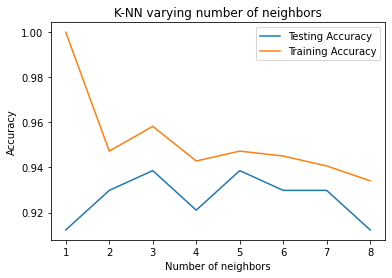

In [37]:
plt.title('K-NN varying number of neighbors')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


Conclusion: From above graph we see training accuracy is more than that of testing accuracy

# Support Vector Machine

In [38]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [40]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [41]:
classess=df.diagnosis
classess

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [42]:
featuress = df.drop(['diagnosis'],axis=1)
featuress

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [43]:
from sklearn import preprocessing
#get col names
names = featuress.columns
#create scaler object
scaler = preprocessing.StandardScaler()
#fit data on the scaler object
scaled_df = scaler.fit_transform(featuress)
featuress = pd.DataFrame(scaled_df,columns=names)

In [44]:
featuress

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [45]:
feat_train, feat_test, class_train, class_test = train_test_split(featuress, classess, train_size=0.9, random_state=100)

In [46]:
svlassifier=SVC(kernel='linear')
svlassifier.fit(feat_train,class_train)

SVC(kernel='linear')

In [47]:
print('features train shape: ', feat_train.shape)
print('classes train shape: ', class_train.shape)
print('features test shape: ', feat_test.shape)
print('classes test shape: ', class_test.shape)

features train shape:  (512, 30)
classes train shape:  (512,)
features test shape:  (57, 30)
classes test shape:  (57,)


In [48]:
pred=svlassifier.predict(feat_test)

In [49]:
accuracy_score(class_test,pred)

0.9473684210526315

In [50]:
print(classification_report(class_test,pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.86      0.93        22

    accuracy                           0.95        57
   macro avg       0.96      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57



In [51]:
cf=confusion_matrix(class_test,pred)
cf

array([[35,  0],
       [ 3, 19]], dtype=int64)

In [52]:
kernels = ['linear','rbf','poly']
for kernel in kernels:
    sv = SVC(kernel=kernel).fit(feat_train,class_train)
    pred=sv.predict(feat_test)
    print("Accuracy:("+kernel+")", accuracy_score(class_test,pred))

Accuracy:(linear) 0.9473684210526315
Accuracy:(rbf) 0.9649122807017544
Accuracy:(poly) 0.8947368421052632


In [53]:
gammas = [0.1,1,10,100]
for gamma in gammas:
    sv = SVC(kernel='rbf', gamma=gamma).fit(feat_train,class_train)
    pred=sv.predict(feat_test)
    print("Accuracy:(", gamma , ")", accuracy_score(class_test,pred))

Accuracy:( 0.1 ) 0.9473684210526315
Accuracy:( 1 ) 0.6140350877192983
Accuracy:( 10 ) 0.6140350877192983
Accuracy:( 100 ) 0.6140350877192983


In [54]:
degrees = [0,1,2,3,4,5,20]
for degree in degrees:
    sv = SVC(kernel='poly', degree=degree).fit(feat_train,class_train)
    pred=sv.predict(feat_test)
    print("Accuracy:(", degree , "):", accuracy_score(class_test,pred))

Accuracy:( 0 ): 0.6140350877192983
Accuracy:( 1 ): 0.9473684210526315
Accuracy:( 2 ): 0.8771929824561403
Accuracy:( 3 ): 0.8947368421052632
Accuracy:( 4 ): 0.8596491228070176
Accuracy:( 5 ): 0.8596491228070176
Accuracy:( 20 ): 0.7543859649122807


# Support Vector Regression

In [122]:
feat_train, feat_test, class_train, class_test = train_test_split(featuress, classess, train_size=0.9, random_state=100)

In [123]:
regressor=SVC(kernel='linear')
regressor.fit(feat_train,class_train)

SVC(kernel='linear')

In [124]:
pred=svlassifier.predict(feat_test)

In [125]:
mean_squared_error(class_test,pred)

0.05263157894736842

# K Means Clustering

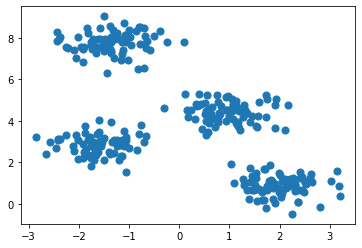

In [59]:
X,y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.5,random_state=0)
plt.scatter(X[:, 0],X[:,1],s=50);

In [60]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [61]:
y_kmeans

array([1, 2, 3, 2, 1, 1, 0, 3, 2, 2, 0, 2, 3, 2, 1, 3, 3, 1, 0, 0, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 3, 0, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 1, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3,
       2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 3, 2, 3,
       0, 0, 1, 2, 1, 3, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3,
       1, 0, 2, 0, 1, 3, 2, 3, 3, 1, 3, 0, 0, 3, 1, 3, 3, 2, 1, 3, 0, 2,
       1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 2, 3, 0, 1, 0, 3, 2, 0, 2, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 1, 3,
       2, 1, 1, 0, 1, 0, 3, 2, 2, 3, 3, 2, 3, 1, 0, 3, 1, 0, 2, 0, 1, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 1, 1, 2, 3, 3, 0, 1,
       2, 0, 3, 2, 3, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 0])

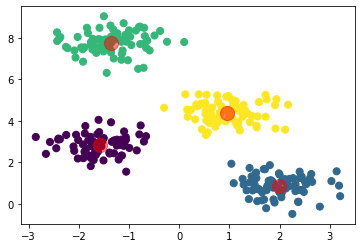

In [62]:
plt.scatter(X[:, 0],X[:,1],c=y_kmeans,s=50,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.5);

In [63]:
df1 = datasets.load_breast_cancer()
df1.data.shape

(569, 30)

In [64]:
df1.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [65]:
kmeans= KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(df1.data)
kmeans.cluster_centers_.shape

(10, 30)

In [66]:
clusters

array([9, 9, 1, 0, 1, 7, 1, 2, 7, 7, 5, 5, 5, 2, 7, 2, 2, 5, 4, 7, 7, 8,
       2, 4, 9, 5, 2, 1, 5, 5, 1, 2, 5, 9, 5, 5, 2, 0, 7, 7, 7, 0, 1, 2,
       7, 1, 8, 7, 0, 7, 0, 7, 0, 5, 2, 0, 9, 2, 7, 8, 8, 8, 2, 8, 2, 2,
       8, 0, 8, 0, 9, 8, 1, 2, 7, 5, 7, 1, 1, 7, 0, 7, 6, 5, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 7, 2, 1, 0, 8, 0, 2, 2, 8, 0, 8, 8, 7, 0, 0, 4, 0,
       8, 0, 7, 8, 8, 0, 8, 2, 5, 5, 0, 1, 4, 7, 7, 7, 2, 1, 2, 1, 0, 5,
       5, 2, 1, 7, 0, 0, 2, 0, 8, 5, 0, 7, 0, 0, 0, 2, 7, 7, 7, 8, 8, 0,
       7, 0, 5, 5, 0, 0, 0, 1, 9, 0, 4, 2, 8, 5, 1, 2, 0, 2, 2, 8, 8, 8,
       8, 2, 7, 0, 6, 9, 5, 0, 2, 8, 5, 0, 0, 0, 7, 7, 8, 7, 2, 7, 2, 5,
       1, 2, 7, 5, 4, 2, 7, 2, 8, 5, 7, 2, 1, 0, 6, 5, 2, 7, 0, 8, 9, 4,
       7, 7, 8, 2, 7, 2, 8, 2, 7, 7, 5, 0, 0, 9, 8, 7, 6, 1, 7, 5, 7, 0,
       0, 7, 1, 8, 7, 7, 0, 0, 9, 0, 9, 5, 9, 2, 9, 2, 5, 2, 9, 5, 5, 2,
       5, 6, 8, 7, 7, 8, 7, 0, 4, 8, 5, 0, 0, 5, 7, 7, 1, 0, 1, 2, 7, 0,
       0, 7, 0, 0, 2, 2, 7, 0, 0, 7, 8, 0, 2, 8, 9,

In [67]:
kmeans.cluster_centers_

array([[1.17684058e+01, 1.79862319e+01, 7.55610870e+01, 4.25743478e+02,
        9.38014493e-02, 7.83112319e-02, 4.32502659e-02, 2.46985362e-02,
        1.75413768e-01, 6.29150000e-02, 2.76519565e-01, 1.27060362e+00,
        1.96543261e+00, 1.99787174e+01, 7.22113043e-03, 2.04303768e-02,
        2.34826855e-02, 9.85089855e-03, 2.10551449e-02, 3.33913913e-03,
        1.29645652e+01, 2.40863043e+01, 8.42486957e+01, 5.13605797e+02,
        1.27910217e-01, 1.82056739e-01, 1.62445254e-01, 7.42174783e-02,
        2.76171014e-01, 7.95076812e-02],
       [1.91604762e+01, 2.14050000e+01, 1.26369048e+02, 1.14311905e+03,
        9.98419048e-02, 1.42173810e-01, 1.68243571e-01, 9.62930952e-02,
        1.93209524e-01, 5.99416667e-02, 7.13964286e-01, 1.27272143e+00,
        4.93688095e+00, 8.57366667e+01, 6.97321429e-03, 3.25688095e-02,
        4.46107143e-02, 1.63225714e-02, 2.27640476e-02, 3.93226190e-03,
        2.29930952e+01, 2.84192857e+01, 1.52921429e+02, 1.61173810e+03,
        1.38404762e-01,

In [68]:
#fig, ax = plt.subplots(2,5, figsize=(8,3))
#centers = kmeans.cluster_centers_.reshape(1,1,1)
#for axi, center in zip(ax.flat,centers):
  #  axi.set(xticks=[],yticks=[])
 #   axi.imshow(center,interpolation='nearest',cmap=plt.cm.binary)

In [69]:
mat= confusion_matrix(df1.target,clusters)
mat

array([[  5,  42,  52,   1,   9,  49,  10,  17,   0,  27],
       [133,   0,  38,   0,   0,   2,   0, 106,  78,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

# Principal Component Analysis 

In [126]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [127]:
X=cancer.data
y=cancer.target

In [128]:
pca = decomposition.PCA(n_components=3)
pca.fit(featuress)
X1 = pca.transform(featuress)

In [129]:
print(cancer.data.shape)
print(featuress.shape)
print(X1.shape)

(569, 30)
(569, 30)
(569, 3)


In [175]:
from sklearn.model_selection import train_test_split
(train_feat,test_feat,train_classes,test_classes)= train_test_split(featuress,classess,train_size=0.5,random_state=6)
dectree = DecisionTreeClassifier()
dectree.fit(train_feat,train_classes)

DecisionTreeClassifier()

In [176]:
from sklearn import metrics
pred=dectree.predict(test_feat)
print("Accuracy:",metrics.accuracy_score(test_classes,pred))

Accuracy: 0.9192982456140351


In [177]:
from sklearn.model_selection import train_test_split
(train_feat,test_feat,train_classes,test_classes)= train_test_split(X1,classess,train_size=0.5,random_state=6)
dectree = DecisionTreeClassifier()
dectree.fit(train_feat,train_classes)

DecisionTreeClassifier()

In [178]:
from sklearn import metrics
pred=dectree.predict(test_feat)
print("Accuracy:",metrics.accuracy_score(test_classes,pred))

Accuracy: 0.9263157894736842


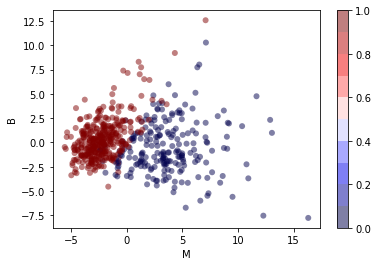

In [179]:
plt.scatter(X1[:,0],X1[:,1],c=cancer.target,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('seismic',10))
plt.xlabel('M')
plt.ylabel('B')
plt.colorbar();

# Select K Percentile and K Best

In [180]:
X_train,X_test,y_train,y_test = train_test_split(featuress,classess,test_size=0.2,random_state=100)

In [181]:
select = SelectPercentile(percentile=80)
select.fit(X_train,y_train)

SelectPercentile(percentile=80)

In [182]:
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (455, 30)
X_train_selected.shape: (455, 24)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True False False  True  True False False  True  True  True  True
  True  True  True  True  True  True]


([], [])

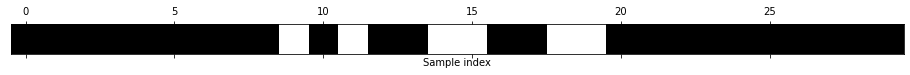

In [183]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [184]:
from sklearn.tree import DecisionTreeClassifier
X_test_selected = select.transform(X_test)
lr = DecisionTreeClassifier()
lr.fit(X_train,y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected,y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test_selected,y_test)))

Score with all features: 0.947
Score with all features: 0.947


In [185]:
select=SelectKBest(k=2)
select.fit(X_train,y_train)

SelectKBest(k=2)

In [186]:
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (455, 30)
X_train_selected.shape: (455, 2)


[False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False  True False False]


([], [])

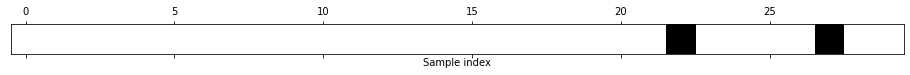

In [187]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

# Feature Seletion-Model Based

In [188]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=10,random_state=42),threshold="median")
#select = SelectFromModel(SVC(kernel='linear'))

In [189]:
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (455, 30)
X_train_l1.shape: (455, 15)


[ True False  True  True False False False  True False False  True False
 False  True False False  True False False False  True  True  True  True
 False  True  True  True  True False]


([], [])

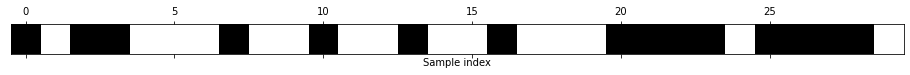

In [190]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [191]:
X_test_l1 = select.transform(X_test)
score = SVC().fit(X_train,y_train).score(X_test,y_test)
print("Test Score: {:.3f}".format(score))
score = SVC().fit(X_train_l1,y_train).score(X_test_l1,y_test)
print("Test Score: {:.3f}".format(score))

Test Score: 0.965
Test Score: 0.956


# Iterative Feature Selection

In [192]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=10,random_state=42),n_features_to_select=20)
select.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=42),
    n_features_to_select=20)

[ True  True  True  True  True False  True  True False False  True False
 False  True False False  True False False  True  True  True  True  True
  True  True  True  True  True False]


([], [])

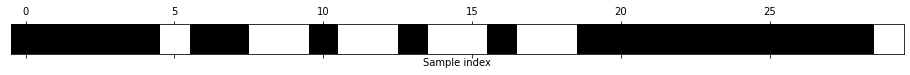

In [193]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [194]:
from sklearn.linear_model import LogisticRegression
X_train_rfe =select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe,y_train).score(X_test_rfe,y_test)
print("Test score: {:.3f}".format(score))
print("Test score: {:.3f}".format(select.score(X_test,y_test)))


Test score: 0.965
Test score: 0.956
